In [188]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime
import pymysql

#Datos de conexión
usuario='EquipoB'
contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#URL de la conexión
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

#Crear l'engine de SQLAlchemy
try:
    engine=create_engine(url_conexion)
    cnx=engine.connect()
    print("Conexión correcta")
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Obtener el nombre de les tablas
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for tabla in nombre_tablas:
    query=f"SELECT * FROM {tabla}"
    
    try:
        df[tabla] = pd.read_sql(query, cnx)
        print(f"Tabla '{tabla}' cargada correctamente.")
    except Exception as e:
        print(f"Error al cargar la tabla '{tabla}':{e}")
  
# Cerrrar la conexión
cnx.close()

Conexión correcta
Tabla 'BANK_marketing' cargada correctamente.
Tabla 'BANK_marketing131024' cargada correctamente.
Tabla 'BANK_marketing211024' cargada correctamente.
Tabla 'BANK_marketing_backup_211024' cargada correctamente.


In [189]:
plt.style.use("seaborn-v0_8-deep")

In [190]:
df_bank = df['BANK_marketing211024']

df_finanzas = df_bank[['id','age','job','marital','education','default','balance','housing','loan','deposit']]

In [191]:
df_finanzas.head()

,id,age,job,marital,education,default,balance,housing,loan,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,1
1,2,59,admin.,married,secondary,0,2343,1,0,1
2,3,56,admin.,married,secondary,0,45,0,0,1
3,4,41,technician,married,secondary,0,1270,1,0,1
4,5,55,services,married,secondary,0,2476,1,0,1


In [192]:
df_finanzas.describe()

,id,age,default,balance,housing,loan,deposit
count,26163.000000,26163.000000,26163.000000,26163.000000,26163.000000,26163.000000,26163.00000
mean,13166.088216,41.278905,0.014830,1522.062607,0.472882,0.132668,0.47357
std,7642.948371,11.965048,0.120875,3254.107270,0.499274,0.339222,0.49931
min,1.000000,18.000000,0.000000,-6847.000000,0.000000,0.000000,0.00000
25%,6541.500000,32.000000,0.000000,123.000000,0.000000,0.000000,0.00000
50%,13082.000000,39.000000,0.000000,543.000000,0.000000,0.000000,0.00000
75%,19842.500000,49.000000,0.000000,1704.000000,1.000000,0.000000,1.00000
max,26383.000000,95.000000,1.000000,81204.000000,1.000000,1.000000,1.00000


In [193]:
df_finanzas.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
deposit      0
dtype: int64

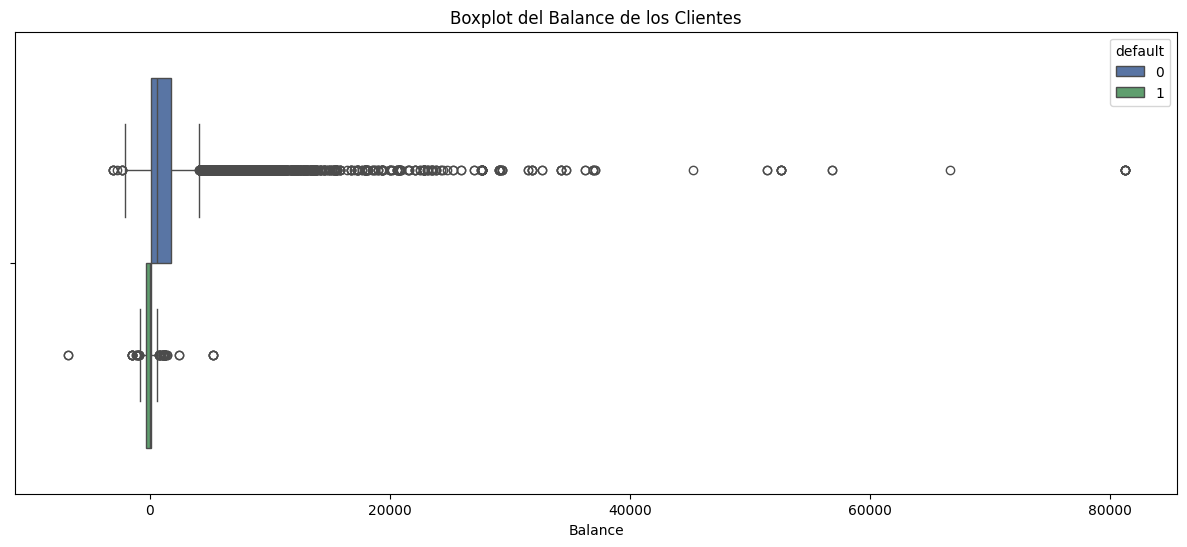

In [194]:
plt.figure(figsize=(15, 6))

sns.boxplot(data=df_finanzas, x = "balance", hue="default")

plt.title("Boxplot del Balance de los Clientes")
plt.xlabel("Balance")

plt.show()

In [195]:
def cuartiles(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q

Q1, Q2, Q3, min_Q, max_Q = cuartiles(df_finanzas['balance'])

print(f"Minimum: {min_Q}\n"
      f"Q1: {Q1}\n"
      f"Q2: {Q2}\n"
      f"Q3: {Q3}\n"
      f"Maximum: {max_Q}")

Minimum: -2248.5
Q1: 123.0
Q2: 543.0
Q3: 1704.0
Maximum: 4075.5


In [196]:
def clasificacion_clientes (balance):
    if balance < min_Q:
        return "muy bajo"
    elif balance < Q1:
        return "bajo"
    elif balance < Q2:
        return "medio-bajo"
    elif balance < Q3:
        return "medio-alto"
    elif balance < max_Q:
        return "alto"
    else:
        return "muy alto"
    
df_finanzas["descripcion_balance"] = df_finanzas["balance"].apply(clasificacion_clientes)


order = ['muy bajo', 'bajo', 'medio-bajo', 'medio-alto', 'alto', 'muy alto']
df_finanzas['descripcion_balance'] = pd.Categorical(df_finanzas['descripcion_balance'], categories=order, ordered=True)
df_finanzas = df_finanzas.sort_values(by='descripcion_balance').reset_index(drop=True)


C:\Users\Natalya\AppData\Local\Temp\ipykernel_7408\1133627140.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finanzas["descripcion_balance"] = df_finanzas["balance"].apply(clasificacion_clientes)
C:\Users\Natalya\AppData\Local\Temp\ipykernel_7408\1133627140.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finanzas['descripcion_balance'] = pd.Categorical(df_finanzas['descripcion_balance'], categories=order, ordered=True)


In [197]:
df_finanzas

,id,age,job,marital,education,default,balance,housing,loan,deposit,descripcion_balance
0,10644,52,management,married,tertiary,0,-2712,1,1,0,muy bajo
1,22277,51,management,divorced,tertiary,0,-2282,1,1,0,muy bajo
2,14901,39,self-employed,married,tertiary,0,-3058,1,1,1,muy bajo
3,24039,39,self-employed,married,tertiary,0,-3058,1,1,1,muy bajo
4,6799,49,management,married,tertiary,1,-6847,0,1,0,muy bajo
...,...,...,...,...,...,...,...,...,...,...,...
26158,22252,43,self-employed,married,secondary,0,14144,1,0,1,muy alto
26159,24319,37,management,married,tertiary,0,5106,0,0,1,muy alto
26160,1386,59,retired,married,tertiary,0,9676,0,0,1,muy alto
26161,2687,46,management,married,tertiary,0,7331,0,0,1,muy alto


In [198]:
# Definir el rango de agrupación (cada 250)
bins = range(-7000, 5000, 250)  

# Crear una nueva columna que contenga los rangos
df_finanzas['rango'] = pd.cut(df_finanzas['balance'], bins)

In [199]:
resultado = df_finanzas.groupby("rango")['default'].mean() * 100
resultado = resultado.reset_index(name="% incumplimiento")

C:\Users\Natalya\AppData\Local\Temp\ipykernel_7408\246168475.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado = df_finanzas.groupby("rango")['default'].mean() * 100


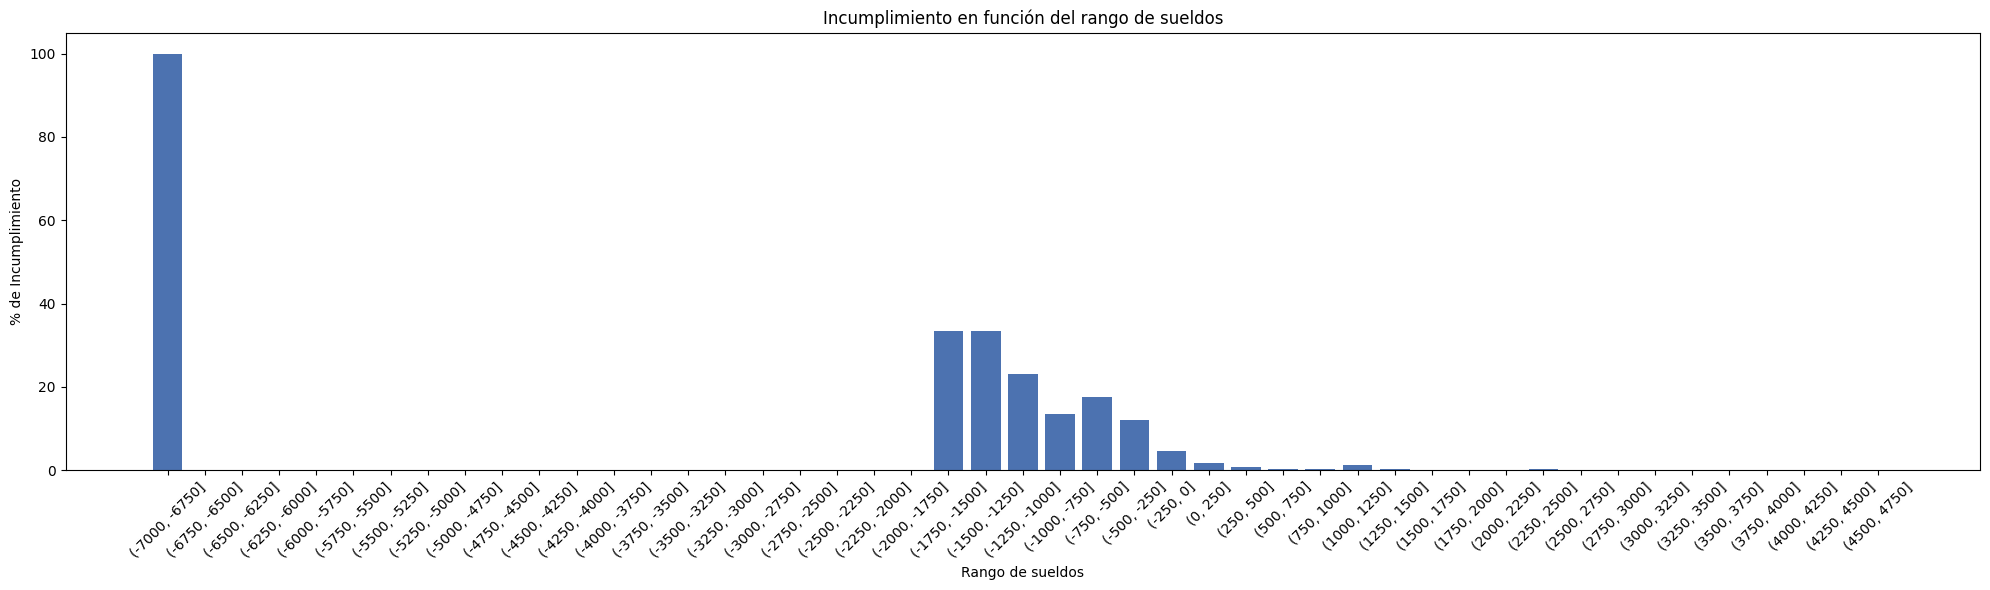

In [200]:
# Creamos el gráfico de barras
plt.figure(figsize=(20,6))
plt.bar(resultado['rango'].astype(str), resultado['% incumplimiento'])

# Añadir título y etiquetas
plt.title('Incumplimiento en función del rango de sueldos')
plt.xlabel('Rango de sueldos')
plt.ylabel('% de Incumplimiento')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [201]:
df_finanzas.groupby("rango").size().reset_index(name="cantidad clientes")

C:\Users\Natalya\AppData\Local\Temp\ipykernel_7408\1191905393.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_finanzas.groupby("rango").size().reset_index(name="cantidad clientes")


,rango,cantidad clientes
0,"(-7000, -6750]",2
1,"(-6750, -6500]",0
2,"(-6500, -6250]",0
3,"(-6250, -6000]",0
4,"(-6000, -5750]",0
5,"(-5750, -5500]",0
6,"(-5500, -5250]",0
7,"(-5250, -5000]",0
8,"(-5000, -4750]",0
9,"(-4750, -4500]",0


Hay muy pocos clientes que tienen saldo inferior a -1000.

In [202]:
# Crear un filtro para seleccionar los rangos entre -2000 y 1500
filtro = (resultado['rango'].apply(lambda x: x.left >= -2000 and x.right <= 2500))

# Aplicar el filtro al DataFrame resultado
resultado_filtrado = resultado[filtro]

# Mostrar el resultado
print(resultado_filtrado)


             rango  % incumplimiento
20  (-2000, -1750]          0.000000
21  (-1750, -1500]         33.333333
22  (-1500, -1250]         33.333333
23  (-1250, -1000]         23.076923
24   (-1000, -750]         13.580247
25    (-750, -500]         17.647059
26    (-500, -250]         12.153518
27       (-250, 0]          4.564473
28        (0, 250]          1.707405
29      (250, 500]          0.852820
30      (500, 750]          0.250209
31     (750, 1000]          0.342270
32    (1000, 1250]          1.323408
33    (1250, 1500]          0.211193
34    (1500, 1750]          0.000000
35    (1750, 2000]          0.000000
36    (2000, 2250]          0.000000
37    (2250, 2500]          0.388350


C:\Users\Natalya\AppData\Local\Temp\ipykernel_7408\3795187057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultado_filtrado['rango_str'] = resultado_filtrado['rango'].astype(str)


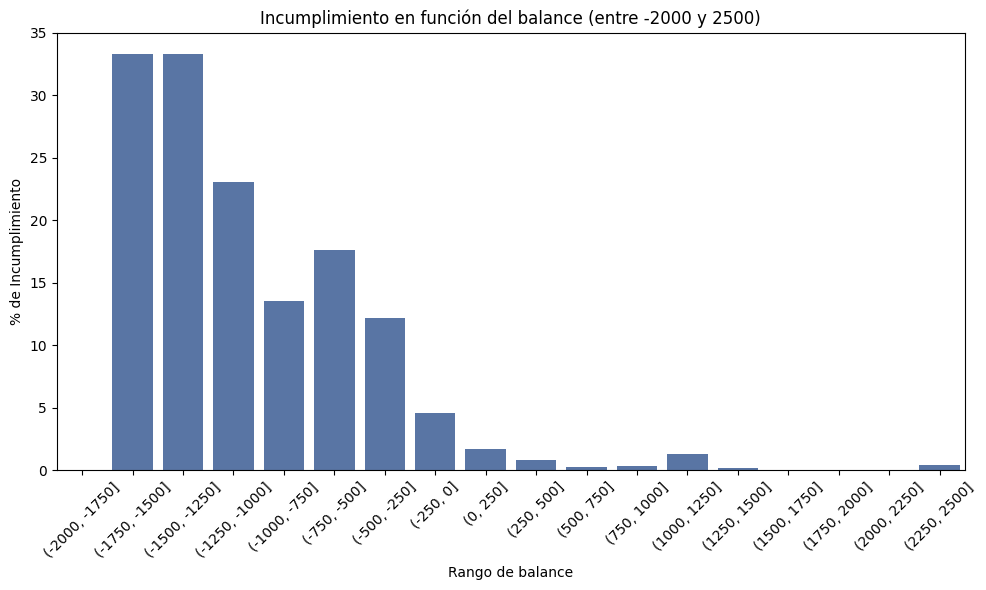

In [203]:
# Convertir los intervalos a cadenas para las etiquetas del gráfico
resultado_filtrado['rango_str'] = resultado_filtrado['rango'].astype(str)

# Crear el gráfico con los datos filtrados
plt.figure(figsize=(10,6))
sns.barplot(x='rango_str', y='% incumplimiento', data=resultado_filtrado)

# Añadir título y etiquetas
plt.title('Incumplimiento en función del balance (entre -2000 y 2500)')
plt.xlabel('Rango de balance')
plt.ylabel('% de Incumplimiento')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## Random Forest

### Creación del modelo

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X = df_finanzas[['balance']]  # Variable explicativa
y = df_finanzas['default']    # Variable objetivo

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [206]:
# Predecir el estado de incumplimiento para el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Generar un informe de clasificación
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7723
           1       0.68      0.24      0.35       126

    accuracy                           0.99      7849
   macro avg       0.83      0.62      0.67      7849
weighted avg       0.98      0.99      0.98      7849



1. Precision (Precisión):
* Clase 0 (no moroso): 0.99. Esto significa que el 99% de los clientes que el modelo predijo como no morosos realmente no lo son. Es un excelente resultado.
* Clase 1 (moroso): 0.68. Aquí, el 68% de los clientes que el modelo predijo como morosos realmente lo son. Aunque no está mal, deja espacio para mejorar, ya que se producen falsos positivos (clientes clasificados como morosos que no lo son).

2. Recall (Sensibilidad o Tasa de Verdaderos Positivos):
* Clase 0 (no moroso): 1.00. El modelo detecta correctamente todos los clientes no morosos, lo que indica una alta capacidad para identificar correctamente a quienes no incumplen.
* Clase 1 (moroso): 0.24. Solo el 24% de los clientes que efectivamente incumplen son correctamente identificados como morosos. Esto significa que el modelo está perdiendo muchos casos de morosidad (falsos negativos), lo cual es un problema importante en el contexto de gestión de riesgos.

3. F1-Score:
* Clase 0 (no moroso): 0.99. El F1-Score es una medida que equilibra precisión y recall. Para la clase 0, es casi perfecto (0.99), lo que indica que el modelo maneja muy bien a los clientes no morosos.
* Clase 1 (moroso): 0.35. Un F1-Score de 0.35 para los morosos refleja un equilibrio pobre entre precisión y recall. El bajo recall está afectando este valor, lo que sugiere que el modelo no está capturando adecuadamente a los clientes morosos.

4. Support:
* Clase 0 (no moroso): 7723
* Clase 1 (moroso): 126

Aquí vemos un claro desequilibrio en las clases: hay muchos más clientes no morosos (7723) en comparación con los morosos (126). Este desbalance de clases puede afectar negativamente al modelo, ya que tiende a enfocarse más en predecir la clase mayoritaria (no morosos).

5. Accuracy (Exactitud):
El modelo tiene una exactitud general del 99%, lo cual suena muy alto, pero en realidad está sesgado por el desbalance de clases. Dado que hay muy pocos morosos en comparación con no morosos, un modelo que simplemente predijera siempre "no moroso" podría obtener una alta exactitud.

Conclusiones:

* Desempeño en la clase 0 (no moroso): El modelo es excelente para identificar a los clientes no morosos, con un recall perfecto (1.00) y una precisión casi perfecta (0.99).
* Desempeño en la clase 1 (moroso): El modelo no está capturando bien a los clientes morosos, con un recall muy bajo (0.24). Esto significa que muchos clientes que en realidad son morosos están siendo clasificados incorrectamente como no morosos.

Desbalance de clases: Este es probablemente el mayor problema. La clase morosa tiene muy pocos ejemplos en comparación con la clase no morosa, lo que lleva a que el modelo se enfoque más en predecir la clase mayoritaria.


### Probabilidades de incumplimiento

Cálculo de probabilidades de incumplimiento:

In [207]:
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

results = pd.DataFrame({'saldo': X_test['balance'], 'probabilidad_incumplimiento': y_prob})

In [208]:
results.head()

,saldo,probabilidad_incumplimiento
674,0,0.037102
7628,495,0.000000
8021,154,0.000000
25705,4721,0.000000
13602,1610,0.000000


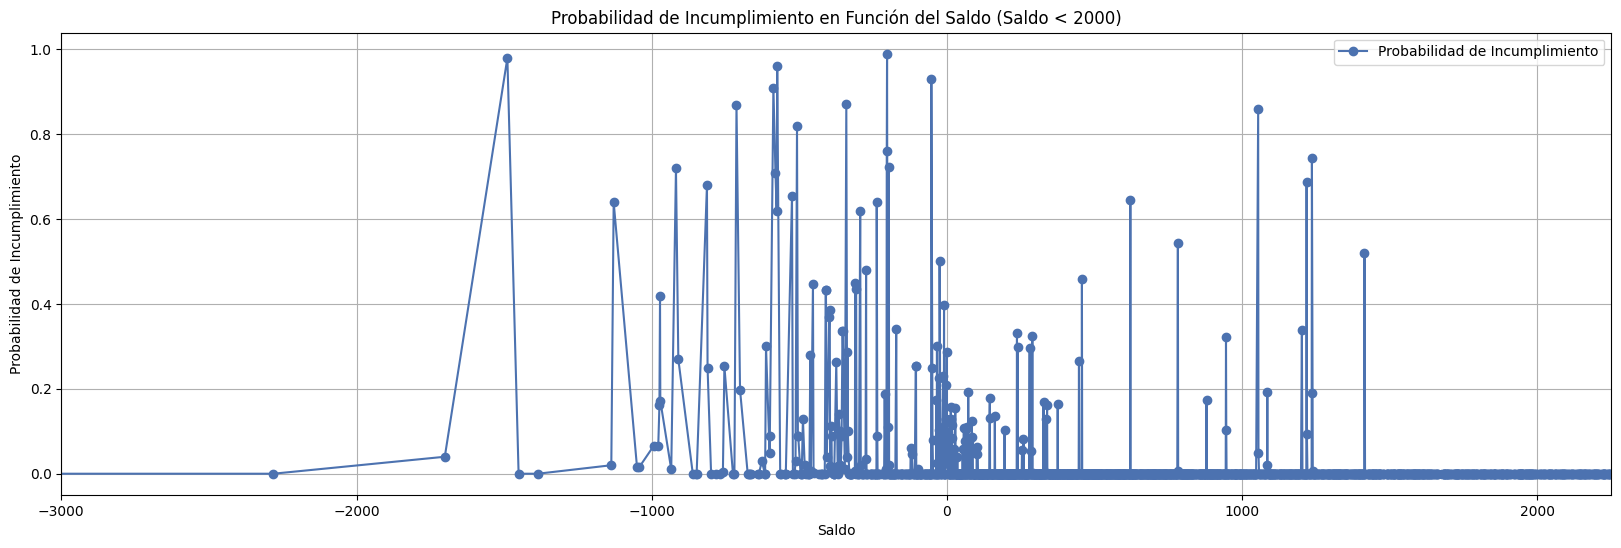

In [209]:
# Agrupar por saldo y calcular la probabilidad media de incumplimiento
saldo_probabilidad = results.groupby('saldo').mean().reset_index()

saldo_filtrado = saldo_probabilidad[saldo_probabilidad['saldo'] < 2250].copy()

plt.figure(figsize=(20, 6))
plt.plot(saldo_filtrado['saldo'], saldo_filtrado['probabilidad_incumplimiento'], marker='o', label='Probabilidad de Incumplimiento')
plt.xlabel('Saldo')
plt.ylabel('Probabilidad de Incumplimiento')
plt.title('Probabilidad de Incumplimiento en Función del Saldo (Saldo < 2000)')


plt.xlim(-3000, 2250)
plt.grid()
plt.legend()
plt.show()

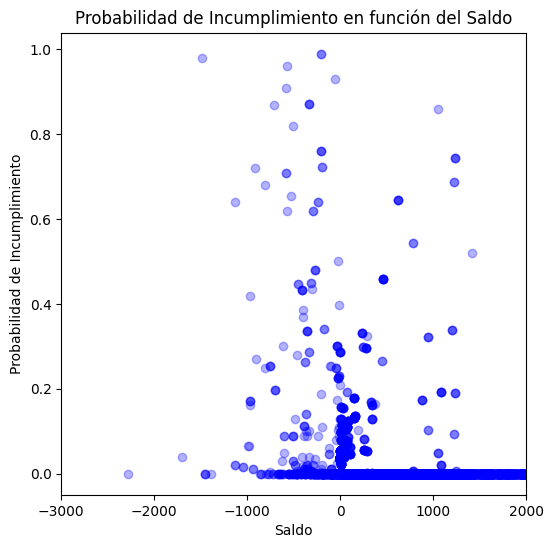

In [210]:
# Gráfico de dispersión para mostrar la relación entre saldo y probabilidad de incumplimiento
plt.figure(figsize=(6, 6))
plt.scatter(results['saldo'], results['probabilidad_incumplimiento'], alpha=0.3, color='b')
plt.title('Probabilidad de Incumplimiento en función del Saldo')
plt.xlabel('Saldo')
plt.xlim(-3000,2000)
plt.ylabel('Probabilidad de Incumplimiento')
plt.show()

Se observan las probabilidades de incumplimiento para saldos individuales, no estan agrupados por rangos. 

Al no estar agrupados, dificulta ver el comportamiento general. Lo que sí vemos es que entorno y por debajo de 0€, hay mas puntos representativos de probabilidades y de magnitud más elevada. 

C:\Users\Natalya\AppData\Local\Temp\ipykernel_7408\1310261088.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado_prob = results.groupby('rango')['probabilidad_incumplimiento'].mean().reset_index()


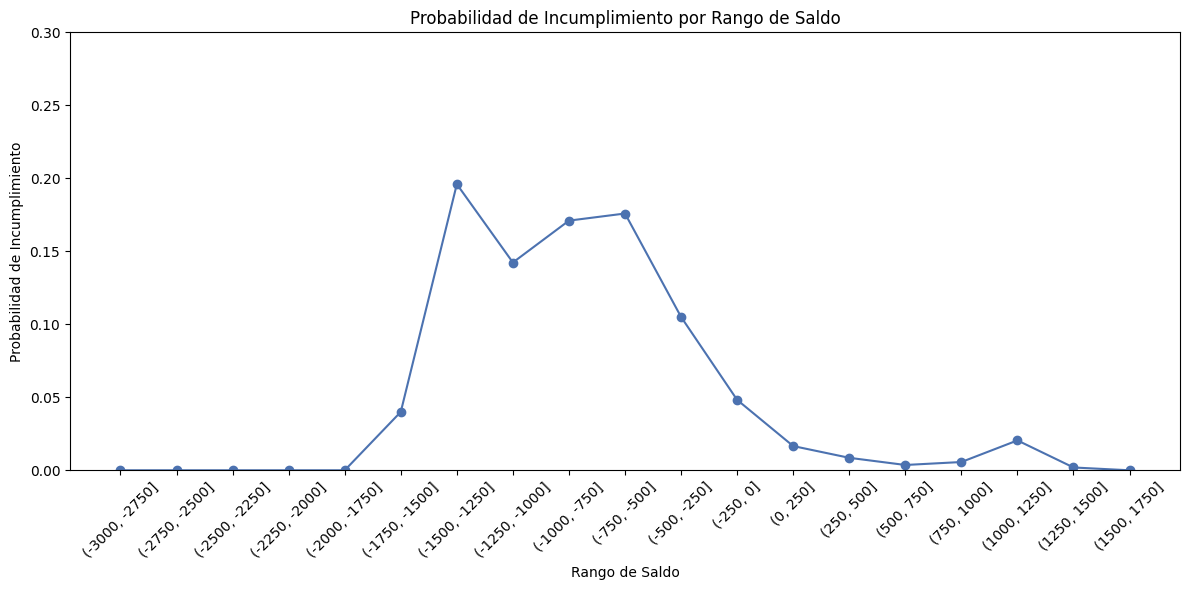

In [211]:
# Definir el rango de agrupación (por ejemplo, cada 250)
bins = range(-3000, 2000, 250)  
results['rango'] = pd.cut(results['saldo'], bins)

# Agrupar por rango y calcular la probabilidad media
resultado_prob = results.groupby('rango')['probabilidad_incumplimiento'].mean().reset_index()
resultado_prob['probabilidad_incumplimiento'] = resultado_prob['probabilidad_incumplimiento'].fillna(0)


# Visualizar los resultados con un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(resultado_prob['rango'].astype(str), resultado_prob['probabilidad_incumplimiento'], marker='o', linestyle='-')

plt.title('Probabilidad de Incumplimiento por Rango de Saldo')
plt.xlabel('Rango de Saldo')
plt.ylabel('Probabilidad de Incumplimiento')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
plt.ylim(0, 0.3)  

plt.tight_layout()
plt.show()

Hay rangos donde la probabilidad de incumplimiento es 0, debido a que no hay clientes con saldos en esos rangos. Este vacío en la muestra es una **limitación** del análisis, ya que no se puede inferir la probabilidad en esos rangos sin datos reales.

Los valores 0 en ciertos rangos y otros rangos con valores significativos indican una distribución desigual de los clientes, lo que puede sesgar los resultados del análisis. Estos vacíos limitan la capacidad de generalizar el comportamiento de incumplimiento a toda la población de clientes.

**Limitaciones del Modelo y Análisis:**
* Falta de datos en ciertos rangos: la ausencia de clientes en ciertos rangos reduce la robustez de las conclusiones sobre esos segmentos y hace que la extrapolación de las probabilidades sea riesgosa. Las estimaciones para los segmentos sin datos pueden ser incorrectas o sesgadas si se aplican métodos de interpolación sin justificación sólida.
* Sobreajuste: Si el modelo se ajusta a las categorías donde sí tenemos clientes, el rendimiento en categorías sin clientes será incierto.
* Distribución de los datos: El análisis puede estar influenciado por la concentración de clientes en ciertos rangos, lo que puede hacer que los resultados sean poco representativos para la población general.

### Análisis adicional del rendimiento del modelo -- revisar

El **Gráfico de Ganancia Cumulativa o Lift Chart** es una herramienta útil para evaluar el rendimiento de un modelo de clasificación, particularmente en términos de cómo predice la probabilidad de un evento (en este caso, el incumplimiento) frente a un modelo aleatorio.  

¿Qué es el Gráfico de Ganancia Cumulativa?
El Lift Chart o Gráfico de Ganancia Cumulativa muestra la proporción de verdaderos positivos acumulados en función del porcentaje de observaciones clasificadas, comparado con un modelo aleatorio. En otras palabras, te ayuda a visualizar cuánto mejor está el modelo en identificar los eventos de incumplimiento en comparación con lo que se esperaría de una selección aleatoria.

*Interpretación del Gráfico*
* Curva del Modelo: Si la curva del modelo es más pronunciada al principio, significa que tu modelo está identificando más casos de incumplimiento en las primeras observaciones (aquellas con mayor probabilidad predicha). Por ejemplo, si en el primer 20% de las observaciones predices correctamente el 50% de los incumplimientos reales, esto indica que tu modelo está funcionando mucho mejor que un modelo aleatorio.

* Línea Aleatoria: Esta es la línea base que representa un modelo aleatorio. En cualquier punto del gráfico, la ganancia acumulada de un modelo aleatorio sería proporcional al porcentaje de datos evaluados.

* Lift: El lift es la relación entre la ganancia de tu modelo y la ganancia esperada de un modelo aleatorio. Si tu modelo muestra un incremento rápido al inicio, significa que está identificando con éxito más incumplimientos de lo esperado, por lo tanto, tiene un lift elevado.

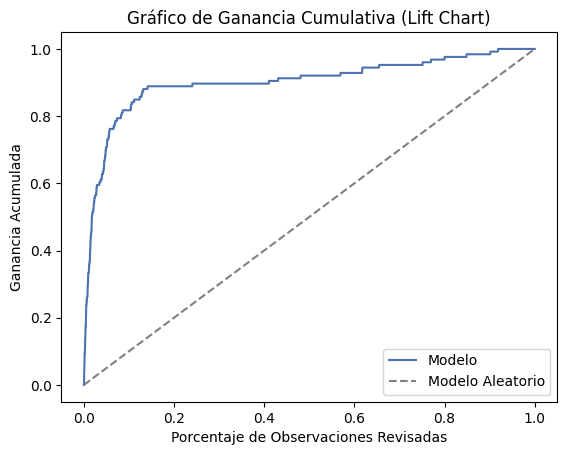

In [212]:
# Combinar los dataframes
df = results.join(df_finanzas[['default']], how='left')

# Renombrar la columna 'default' 
df.rename(columns={'default': 'incumplimiento_real'}, inplace=True)


# Ordenar por probabilidad de incumplimiento predicha
df = df.sort_values(by='probabilidad_incumplimiento', ascending=False)

# Calcular los verdaderos positivos acumulados
df['verdaderos_positivos_acum'] = df['incumplimiento_real'].cumsum()

# Calcular el porcentaje de observaciones revisadas
df['porcentaje_observaciones'] = np.arange(1, len(df)+1) / len(df)

# Calcular el porcentaje acumulado de incumplimientos (ganancia)
df['ganancia_acumulada'] = df['verdaderos_positivos_acum'] / df['incumplimiento_real'].sum()

# Crear el gráfico
plt.plot(df['porcentaje_observaciones'], df['ganancia_acumulada'], label='Modelo')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Modelo Aleatorio')
plt.xlabel('Porcentaje de Observaciones Revisadas')
plt.ylabel('Ganancia Acumulada')
plt.title('Gráfico de Ganancia Cumulativa (Lift Chart)')
plt.legend()
plt.show()


Interpretación del Lift Chart:
* Eje X: Representa el porcentaje de observaciones revisadas (ordenadas según la probabilidad de incumplimiento, de mayor a menor). Este eje refleja cuántas observaciones (en porcentaje) han sido consideradas.

* Eje Y: Indica la ganancia acumulada, es decir, el porcentaje acumulado de positivos (incumplimientos) identificados. A medida que recorres el eje X, ves cuántos incumplimientos ha capturado tu modelo.

* Línea punteada (modelo aleatorio): Representa un modelo que selecciona observaciones de manera aleatoria. Si revisas un 10% de las observaciones, el modelo aleatorio debería capturar el 10% de los incumplimientos, y así sucesivamente, dando lugar a una línea recta con pendiente de 45 grados.

* Curva azul (modelo entrenado): Muestra el rendimiento de tu modelo. Una curva que se separa rápidamente hacia arriba (como lo hace la tuya) indica que el modelo está haciendo un buen trabajo en capturar rápidamente los incumplimientos, ordenando las observaciones de manera efectiva.

Conclusiones:
* *Desempeño del modelo:* Tu modelo está funcionando bastante bien, ya que al principio (primeros porcentajes en el eje X) la curva azul sube rápidamente, lo que significa que revisando un pequeño porcentaje de las observaciones, logras identificar un alto porcentaje de los incumplimientos.

* *Ganancia temprana:* Al revisar alrededor del 20% de las observaciones, tu modelo está capturando más del 80% de los incumplimientos, lo que sugiere que está priorizando correctamente las observaciones con mayor probabilidad de incumplimiento.

* *Eficiencia:* Comparado con el modelo aleatorio, tu modelo tiene una ganancia acumulada mucho más alta en las primeras revisiones. Esto indica que el modelo es significativamente más eficiente al ordenar las observaciones y seleccionar aquellas que tienen mayor probabilidad de incumplimiento.

* *Punto de saturación:* La curva azul se empieza a aplanar a medida que te acercas al 100% de las observaciones. Esto indica que después de cierto punto, la capacidad del modelo de encontrar más incumplimientos disminuye, lo cual es natural, dado que los primeros datos revisados son los de mayor riesgo.

### Identificación del punto en que se produce cambio brusco en la probabilidad -- revisar 

**Detección de Cambio (Change Point Detection):**

* Usa un algoritmo de detección de puntos de cambio para identificar un cambio brusco en la tendencia de la probabilidad de incumplimiento en función del saldo. Esto puede ayudarte a detectar el saldo exacto en el que la probabilidad de incumplimiento aumenta significativamente.
* Librerías como ruptures en Python permiten realizar este tipo de análisis.

In [213]:
%pip install ruptures

import ruptures as rpt

# Selecciona la columna de probabilidades predichas y balances
signal = results[['probabilidad_incumplimiento', 'saldo']].values

# Detecta los puntos de cambio
algo = rpt.Binseg(model="l2").fit(signal)
result = algo.predict(n_bkps=1)  # Solo queremos un punto de cambio principal

print(f'Punto de cambio estimado en el saldo: {results.iloc[result[0]]["saldo"]}')


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: ruptures in c:\users\natalya\appdata\local\programs\python\python312\lib\site-packages (1.1.9)

Punto de cambio estimado en el saldo: 2021


*No entiendo muy bien por que detecta este punto como el punto de cambio.*

### Análisis estadistico -- revisar

**Prueba de proporciones (z-test para proporciones):**

Si te interesa saber si las diferencias en el porcentaje de incumplimiento entre diferentes rangos de saldo son significativas, podrías aplicar una prueba de proporciones.
Por ejemplo, si comparas el porcentaje de incumplimiento de dos rangos de saldo distintos, podrías usar una prueba de hipótesis sobre proporciones para ver si las diferencias son estadísticamente significativas.

In [214]:
from scipy.stats import kruskal

# Filtrar los valores NaN de la columna 'rango' y 'probabilidad_incumplimiento'
results_clean = results.dropna(subset=['rango', 'probabilidad_incumplimiento'])

# Crear una lista para almacenar los datos de cada grupo/rango
grupos = [results_clean[results_clean['rango'] == rango]['probabilidad_incumplimiento'] 
          for rango in results_clean['rango'].unique()]

# Realizar la prueba Kruskal-Wallis
stat, p_value = kruskal(*grupos)

print(f'Estadístico H: {stat}')
print(f'P-valor: {p_value}')


Estadístico H: 2228.7827117366464
P-valor: 0.0


El p-valor es menor que 0.05 (nivel de significancia típico), podemos rechazar la hipótesis nula de que las distribuciones de probabilidad de incumplimiento en los diferentes rangos son iguales, lo que sugiere que los rangos de saldo influyen significativamente en la probabilidad de incumplimiento.

In [215]:
%pip install scikit-posthocs

from scipy.stats import kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scikit_posthocs import posthoc_dunn

# Filtrar los valores NaN de la columna 'rango' y 'probabilidad_incumplimiento'
results_clean = results.dropna(subset=['rango', 'probabilidad_incumplimiento'])

# Crear una lista para almacenar los datos de cada grupo/rango
grupos = [results_clean[results_clean['rango'] == rango]['probabilidad_incumplimiento'] 
          for rango in results_clean['rango'].unique()]

# Realizar la prueba Kruskal-Wallis
stat, p_value = kruskal(*grupos)

print(f'\nEstadístico H: {stat}')
print(f'\nP-valor: {p_value}')

# Realizar la prueba post-hoc de Dunn
dunn_results = posthoc_dunn(results_clean, val_col='probabilidad_incumplimiento', group_col='rango', p_adjust='bonferroni')

print(dunn_results)


Note: you may need to restart the kernel to use updated packages.

Estadístico H: 2228.7827117366464

P-valor: 0.0
                (-2500, -2250]  (-1750, -1500]  (-1500, -1250]  \
(-2500, -2250]             1.0        1.000000        1.000000   
(-1750, -1500]             1.0        1.000000        1.000000   
(-1500, -1250]             1.0        1.000000        1.000000   
(-1250, -1000]             1.0        1.000000        1.000000   
(-1000, -750]              1.0        1.000000        0.441648   
(-750, -500]               1.0        1.000000        1.000000   
(-500, -250]               1.0        1.000000        1.000000   
(-250, 0]                  1.0        1.000000        0.497749   
(0, 250]                   1.0        1.000000        1.000000   
(250, 500]                 1.0        1.000000        1.000000   
(500, 750]                 1.0        1.000000        1.000000   
(750, 1000]                1.0        1.000000        1.000000   
(1000, 1250]               


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\Natalya\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikit_posthocs\_posthocs.py:368: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_lens = x.groupby(_group_col)[_val_col].count()
c:\Users\Natalya\AppData\Local\Programs\Python\Python312\Lib\site-packages\scikit_posthocs\_posthocs.py:371: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_ranks_avg = x.groupby(_group_col)["ranks"].mean()


Estadístico H:

* Valor: 2228.78. 
Este valor indica la estadística de prueba calculada. Un valor más alto generalmente sugiere que hay diferencias significativas entre los grupos.

P-valor:

* Valor: 0.0.
Un p-valor de 0 indica que hay evidencia muy fuerte para rechazar la hipótesis nula, que generalmente establece que no hay diferencia entre los grupos. Esto sugiere que al menos un par de grupos tiene diferencias significativas en las medianas.

Matriz de Comparaciones: 

La matriz que has obtenido muestra los p-valores ajustados para cada comparación entre los diferentes intervalos (o grupos) de datos.

Interpretación de los valores:
* Un p-valor cercano a 1 indica que no hay diferencia significativa entre los grupos comparados.
* Un p-valor cercano a 0 indica diferencias significativas. Por ejemplo, en la matriz, puedes ver que algunos p-valores son extremadamente bajos (por ejemplo, 3.486191e-216 y 7.032442e-295), lo que indica diferencias significativas entre los grupos.

                (-2500, -2250]  (-1750, -1500]  (-1500, -1250]  \
(-2500, -2250]             NaN             NaN             NaN   
(-1750, -1500]             NaN             NaN             NaN   
(-1500, -1250]             NaN             NaN             NaN   
(-1250, -1000]             NaN             NaN             NaN   
(-1000, -750]              NaN             NaN             NaN   
(-750, -500]               NaN             NaN             NaN   
(-500, -250]               NaN             NaN             NaN   
(-250, 0]                  NaN             NaN             NaN   
(0, 250]                   NaN             NaN             NaN   
(250, 500]                 NaN             NaN             NaN   
(500, 750]                 NaN             NaN             NaN   
(750, 1000]                NaN             NaN             NaN   
(1000, 1250]               NaN             NaN             NaN   
(1250, 1500]               NaN             NaN             NaN   
(1500, 175

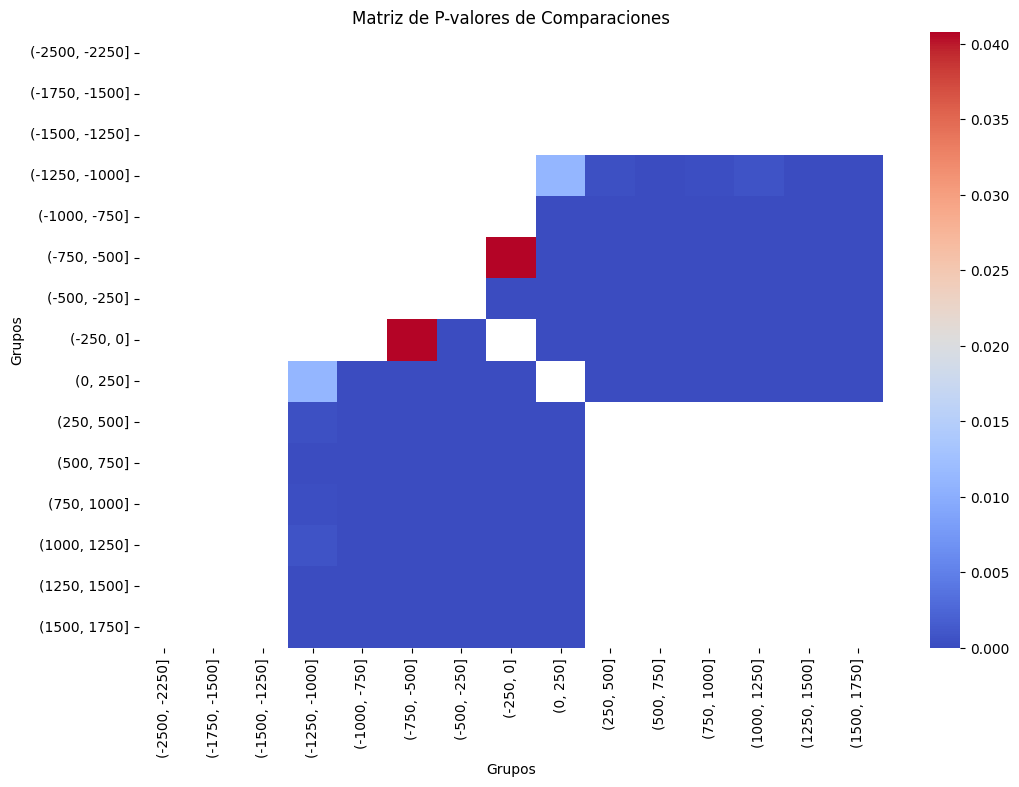

In [216]:
resultados_df = pd.DataFrame(dunn_results) 

# Filtrar los p-valores significativos (por debajo de 0.05)
umbral = 0.05
resultados_significativos = resultados_df[resultados_df < umbral]

# Mostrar solo las comparaciones significativas
print(resultados_significativos)


# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un heatmap con la matriz de p-valores
sns.heatmap(resultados_significativos, annot=False, cmap='coolwarm')

# Títulos y etiquetas
plt.title('Matriz de P-valores de Comparaciones')
plt.xlabel('Grupos')
plt.ylabel('Grupos')

# Mostrar el gráfico
plt.show()
